In [1]:
# %matplotlib notebook - this function only updates the existing plot .. that is why multiple plots are being overwitten

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# File to Load 
city_data_load = "raw_data/city_data.csv"
ride_data_load = "raw_data/ride_data.csv"

city_data = pd.read_csv(city_data_load)
ride_data = pd.read_csv(ride_data_load)

pyber_data = pd.merge(ride_data, city_data, how="left", on=["city"])

pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
grouped_type_df = pyber_data.groupby(["city","type"])
city_total_rides = grouped_type_df["ride_id"].count()
city_driver_count = grouped_type_df["driver_count"].mean()
city_avg_fare = grouped_type_df["fare"].mean()
city_final_df = pd.DataFrame({"Average Fare": city_avg_fare,
                             "Rides Per City":city_total_rides,
                             "Driver Count":city_driver_count})
# city_final_df_ind = city_final_df.reset_index()
city_final_df.head()
# grouped_type_df.head()
# print(city_total_rides)

,,Average Fare,Driver Count,Rides Per City
city,type,,,
Amandaburgh,Urban,24.641667,12,18
Barajasview,Urban,25.332273,26,22
Barronchester,Suburban,36.422500,11,16
Bethanyland,Suburban,32.956111,22,18
Bradshawfurt,Rural,40.064000,7,10


In [5]:
pyber_data_rural_df = pyber_data.loc[pyber_data["type"] == "Rural", :]
ride_city_df_group_rural = pyber_data_rural_df.groupby(["city","type"])
ride_city_df_rideid_ctr_rural = ride_city_df_group_rural["ride_id"].count()
ride_city_df_driver_ctr_rural = ride_city_df_group_rural["driver_count"].count()
ride_city_df_avgfare_rural = ride_city_df_group_rural["fare"].mean()

pyber_data_urban_df = pyber_data.loc[pyber_data["type"] == "Urban", :]
ride_city_df_group_urban = pyber_data_urban_df.groupby(["city","type"])
ride_city_df_rideid_ctr_urban = ride_city_df_group_urban["ride_id"].count()
ride_city_df_driver_ctr_urban = ride_city_df_group_urban["driver_count"].count()
ride_city_df_avgfare_urban = ride_city_df_group_urban["fare"].mean()

pyber_data_suburban_df = pyber_data.loc[pyber_data["type"] == "Suburban", :]
ride_city_df_group_suburban = pyber_data_suburban_df.groupby(["city","type"])
ride_city_df_rideid_ctr_suburban = ride_city_df_group_suburban["ride_id"].count()
ride_city_df_driver_ctr_suburban = ride_city_df_group_suburban["driver_count"].count()
ride_city_df_avgfare_suburban = ride_city_df_group_suburban["fare"].mean()

# rural_driver_count = rural_cities.groupby(["city"].mean()["driver_count"])
pyber_data_urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


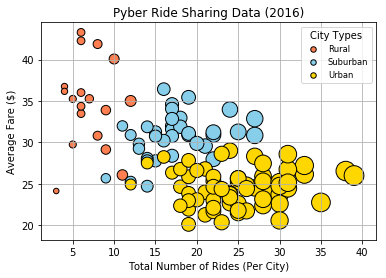

In [6]:
plt.scatter(ride_city_df_rideid_ctr_rural, 
            ride_city_df_avgfare_rural, 
            s=10*ride_city_df_driver_ctr_rural, 
            marker="o", 
            c="coral", 
            edgecolors="black", 
            label = "Rural")
plt.scatter(ride_city_df_rideid_ctr_suburban, 
            ride_city_df_avgfare_suburban, 
            s=10*ride_city_df_driver_ctr_suburban, 
            marker="o", 
            c="skyblue", 
            edgecolors="black", 
            label = "Suburban")
plt.scatter(ride_city_df_rideid_ctr_urban, 
            ride_city_df_avgfare_urban, 
            s=10*ride_city_df_driver_ctr_urban, 
            marker="o", 
            c="gold", 
            edgecolors="black", 
            label = "Urban")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

x=city_total_rides
y=city_avg_fare
plt.grid()
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()
plt.savefig("Pyber.png")

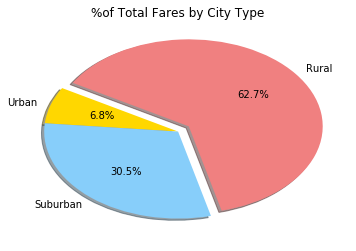

In [7]:
#% of Total Fares by City Type
tot_city_fare_type = 100 * pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum()

plt.pie(tot_city_fare_type,
        labels =["Urban","Suburban","Rural"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)

plt.title("%of Total Fares by City Type")
plt.savefig("Fig1.png")
plt.show()
        

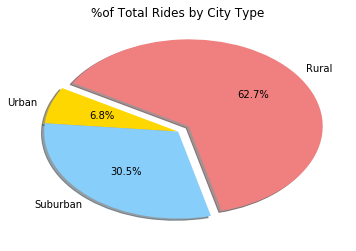

In [8]:
#% of Total Rides by City Type
tot_city_ride_type = 100 * pyber_data.groupby(["type"]).sum()["ride_id"] / pyber_data["ride_id"].count()

plt.pie(tot_city_fare_type,
        labels =["Urban","Suburban","Rural"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)

plt.title("%of Total Rides by City Type")
plt.savefig("Fig3.png")
plt.show()
        

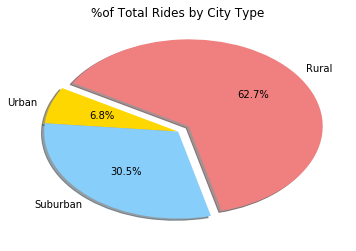

In [9]:
#% of Total Drivers by City Type
tot_city_ride_type = 100 * pyber_data.groupby(["type"]).sum()["driver_count"] / pyber_data["driver_count"].mean()

plt.pie(tot_city_fare_type,
        labels =["Urban","Suburban","Rural"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)

plt.title("%of Total Rides by City Type")
plt.savefig("Fig2.png")
plt.show()

In [10]:
# def color(row):
#     type_ = row['type']
#     if type_=='Urban':
#         color = 'Red'
#     if type_=='Rural':
#         color = 'Blue'
#     if type_=='Suburban':
#         color = 'Green'
#     return color
# pyber_data['color'] = pyber_data.apply(color, axis=1)

# len(city_color)

In [11]:
# Analysis

# Majority of drivers undertake ride sharing between $20 and $30 price range
# Strategy can be adapted to attract more drivers for a higher fare > $30.
